# Purpose:

The purpose of this notebook is to create classification models such that given a customer row information, we are able to predict whether the customer will churn or not. We will be primarily testing out different classification models, running accuracy score and selecting one with the highest accuracy score.


## Reason for classification: 
This will allow the telco company to be able to predict whether if a customer will churn, and hence take early actions to mitigate the likelihood of a customer churning. Churn is also a categorical variable, hence the model here is classification.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Import cleaned data from the data preparation from earlier step.


In [2]:
telco = pd.read_csv('cleanedTelco.csv')
telco.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


## In the dataset, we have many categorical values that are Yes/No and they’re not suitable for training classification models. 

### However, just changing Yes/No into 1 or 0 is not good enough as the machine may assume higher numbers are more important. Hence, OneHotEncoding is used.


In [4]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
telco_cat = telco[['gender', 'seniorcitizen', 'partner', 'dependents','phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies','contract','paperlessbilling','paymentmethod']]
ohe.fit(telco_cat)
telco_cat_ohe = pd.DataFrame(ohe.transform(telco_cat).toarray(), 
                                  columns=ohe.get_feature_names(telco_cat.columns))

# Check the encoded variables
telco_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender_Female                            7043 non-null   float64
 1   gender_Male                              7043 non-null   float64
 2   seniorcitizen_0                          7043 non-null   float64
 3   seniorcitizen_1                          7043 non-null   float64
 4   partner_No                               7043 non-null   float64
 5   partner_Yes                              7043 non-null   float64
 6   dependents_No                            7043 non-null   float64
 7   dependents_Yes                           7043 non-null   float64
 8   phoneservice_No                          7043 non-null   float64
 9   phoneservice_Yes                         7043 non-null   float64
 10  multiplelines_No                         7043 no

In [5]:
telco_cat_ohe

,gender_Female,gender_Male,seniorcitizen_0,seniorcitizen_1,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7041,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Now we need to combine our numeric columns with the new columns that we have created through doing onehotencoding to form a new dataframe telco_ohe:

In [6]:

telco_num = telco[['tenure','monthlycharges','totalcharges']]
telco_res = telco['churn']
telco_ohe = pd.concat([telco_num, telco_cat_ohe, telco_res], 
                           sort = False, axis = 1).reindex(index=telco_num.index)

# Check dataframe
telco_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   monthlycharges                           7043 non-null   float64
 2   totalcharges                             7043 non-null   float64
 3   gender_Female                            7043 non-null   float64
 4   gender_Male                              7043 non-null   float64
 5   seniorcitizen_0                          7043 non-null   float64
 6   seniorcitizen_1                          7043 non-null   float64
 7   partner_No                               7043 non-null   float64
 8   partner_Yes                              7043 non-null   float64
 9   dependents_No                            7043 non-null   float64
 10  dependents_Yes                           7043 no

<AxesSubplot:>

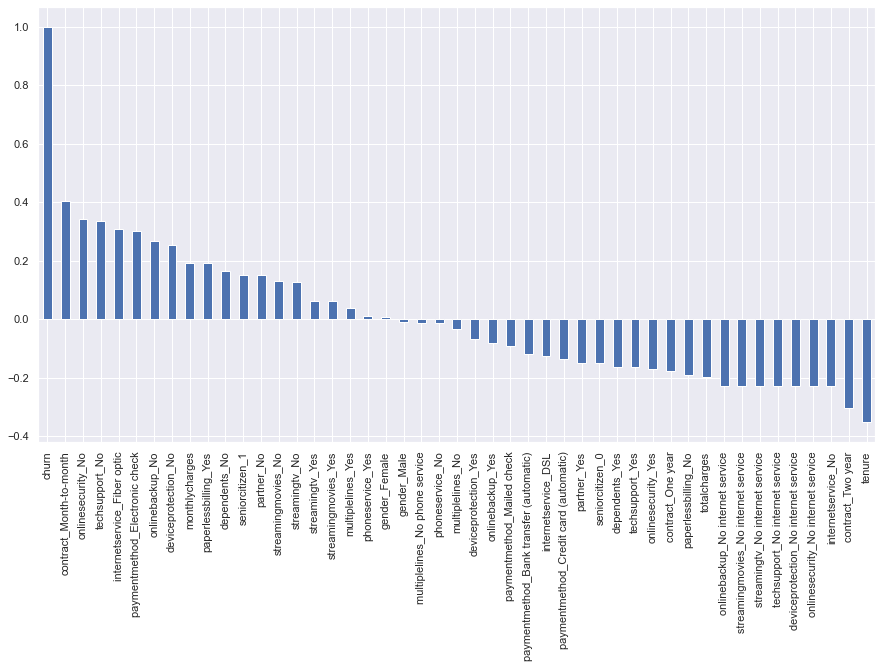

In [7]:
#After we have crafted the new dataframe with onehotencoding, 
#I will first like to be able to have an overview of the correlation between our new columns and the "CHURN" variable.

telco_corr = telco_ohe

telco_corr['churn'].replace(to_replace='Yes', value=1, inplace=True)
telco_corr['churn'].replace(to_replace='No',  value=0, inplace=True)


plt.figure(figsize=(15,8))
telco_corr.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

# ATTEMPT 1, Run different classification model without kfold and hyper parameter tuning (currently using train_test split, 30% of data is reserved for testing)

In [8]:
# X is for predictors, so we do not need the Churn variable
# Y is for response variable, hence we only need to use the Churn variable
y = pd.DataFrame(telco_ohe['churn'])
X = pd.DataFrame(telco_ohe.drop('churn', axis = 1))

## The first classification model we will be using here is the decision tree:

Train Set : (4930, 1) (4930, 46)
Test Set  : (2113, 1) (2113, 46)


[Text(334.8, 587.0880000000001, 'contract_Month-to-month <= 0.5\ngini = 0.39\nsamples = 4930\nvalue = [3619, 1311]\nclass = Churn'),
 Text(167.4, 456.624, 'monthlycharges <= 93.675\ngini = 0.125\nsamples = 2188\nvalue = [2042, 146]\nclass = Churn'),
 Text(83.7, 326.1600000000001, 'contract_Two year <= 0.5\ngini = 0.077\nsamples = 1653\nvalue = [1587, 66]\nclass = Churn'),
 Text(41.85, 195.69600000000003, 'onlinesecurity_No <= 0.5\ngini = 0.138\nsamples = 752\nvalue = [696, 56]\nclass = Churn'),
 Text(20.925, 65.23200000000008, 'gini = 0.087\nsamples = 525\nvalue = [501, 24]\nclass = Churn'),
 Text(62.775000000000006, 65.23200000000008, 'gini = 0.242\nsamples = 227\nvalue = [195, 32]\nclass = Churn'),
 Text(125.55000000000001, 195.69600000000003, 'paymentmethod_Electronic check <= 0.5\ngini = 0.022\nsamples = 901\nvalue = [891, 10]\nclass = Churn'),
 Text(104.625, 65.23200000000008, 'gini = 0.016\nsamples = 847\nvalue = [840, 7]\nclass = Churn'),
 Text(146.475, 65.23200000000008, 'gini 

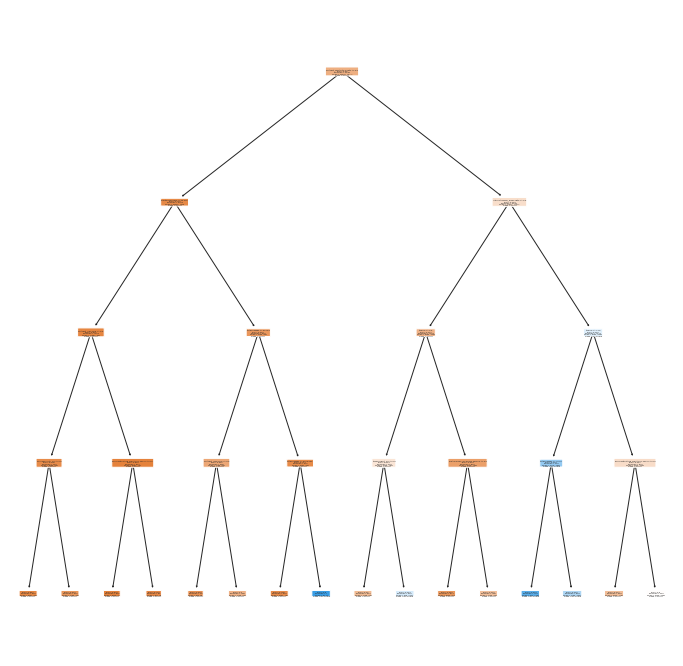

In [9]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_dttrain, X_dttest, y_dttrain, y_dttest = train_test_split(X, y, test_size = 0.3)

# Check the sample sizes
print("Train Set :", y_dttrain.shape, X_dttrain.shape)
print("Test Set  :", y_dttest.shape, X_dttest.shape)

# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4, random_state=1)  # create the decision tree object
dectree.fit(X_dttrain, y_dttrain)                    # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_dttrain.columns, 
          class_names=["Churn","No Churn"])

In [10]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Predict Churn based on Training and Test Data
y_dttrain_pred = dectree.predict(X_dttrain)
y_dttest_pred = dectree.predict(X_dttest)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_dttrain, y_dttrain))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_dttest, y_dttest))
print()



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7931034482758621

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8031235210601041



Train and Test Data Confusion Matrix:


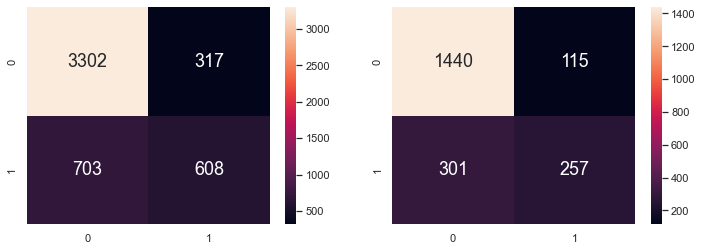

In [11]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_dttrain, y_dttrain_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_dttest, y_dttest_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Train and Test Data Confusion Matrix:")



In [12]:
#Print accuracy measures/rates for Test data

print("Print accuracy measures/rates for Test Data: ")
cmTest = confusion_matrix(y_dttest, y_dttest_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
print()

result1 = pd.Series({'model':"DecisionTree", 'accuracy':dectree.score(X_dttest, y_dttest), 'TPR':(tpTest/(tpTest + fnTest)),
                    'TNR':(tnTest/(tnTest + fpTest)), 'FPR':(fpTest/(fpTest + tnTest)), 'FNR':(fnTest/(fnTest + tpTest))})

Print accuracy measures/rates for Test Data: 
TPR Test :	 0.460573476702509
TNR Test :	 0.9260450160771704

FPR Test :	 0.07395498392282958
FNR Test :	 0.5394265232974911



## Next model we will try out is the logistic regression model for classification.

In [13]:
#creating a logistic regression model

from sklearn.model_selection import train_test_split
X_rmtrain, X_rmtest, y_rmtrain, y_rmtest = train_test_split(X, y, test_size=0.3)

# Running logistic regression model
from sklearn.linear_model import LogisticRegression
rmmodel = LogisticRegression(max_iter=1000,  random_state=1)
result = rmmodel.fit(X_rmtrain, y_rmtrain.values.ravel())

In [14]:
from sklearn import metrics
rmprediction_test = rmmodel.predict(X_rmtest)
rmtraining_test = rmmodel.predict(X_rmtrain)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_rmtrain, rmtraining_test))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_rmtest, rmprediction_test))
print()




Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8056795131845842

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8021769995267393



Train and Test Data Confusion Matrix:


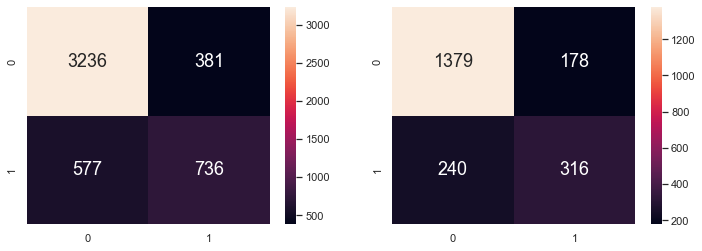

In [15]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_rmtrain, rmtraining_test),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_rmtest, rmprediction_test), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Train and Test Data Confusion Matrix:")



In [16]:
print("Print accuracy measures/rates for Test Data: ")
cmTest = confusion_matrix(y_rmtest, rmprediction_test)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
print()

result2 = pd.Series({'model':"LogisticRegression", 'accuracy':metrics.accuracy_score(y_rmtest, rmprediction_test), 'TPR':(tpTest/(tpTest + fnTest)),
                    'TNR':(tnTest/(tnTest + fpTest)), 'FPR':(fpTest/(fpTest + tnTest)), 'FNR':(fnTest/(fnTest + tpTest))})

Print accuracy measures/rates for Test Data: 
TPR Test :	 0.5683453237410072
TNR Test :	 0.8856775850995504

FPR Test :	 0.11432241490044959
FNR Test :	 0.4316546762589928



AxesSubplot(0.125,0.125;0.775x0.755)


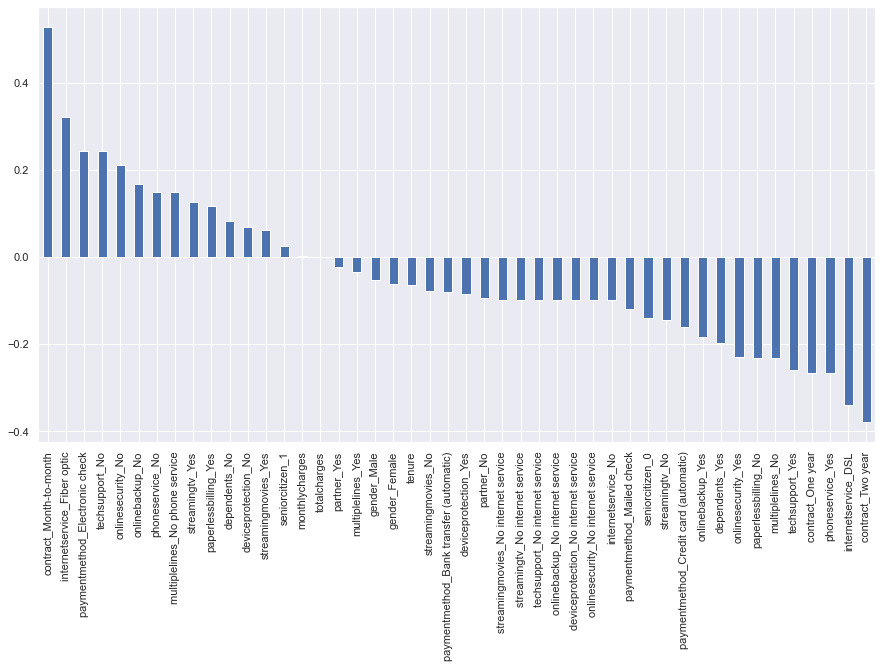

In [17]:
# Since for logistic regression, we do not have a direct tree chart like decision tree to clearly show 
# which variables are the most important, I will chart out the weights of the different variables using the model
# This will show which variables are most important in determining churn using logistic regression
plt.figure(figsize=(15,8))

weights = pd.Series(rmmodel.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False).plot(kind='bar'))

# Next model here is Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
X_rftrain, X_rftest, y_rftrain, y_rftest = train_test_split(X, y, test_size=0.3)
modelforest = RandomForestClassifier( random_state=1)
modelforest.fit(X_rftrain, y_rftrain.values.ravel())

# Make predictions
y_rfprediction_test = modelforest.predict(X_rftest)
y_rfprediction_train = modelforest.predict(X_rftrain)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_rftrain, y_rfprediction_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_rftest, y_rfprediction_test))
print()



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9967545638945233

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7988641741599621



Train and Test Data Confusion Matrix:


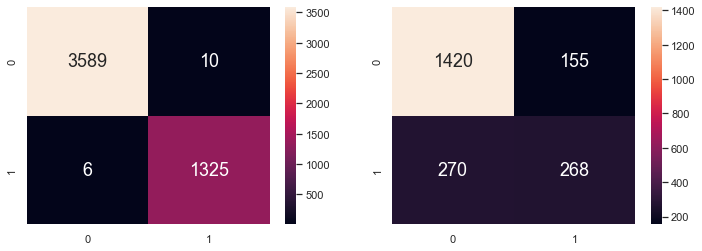

In [19]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_rftrain, y_rfprediction_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_rftest, y_rfprediction_test), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Train and Test Data Confusion Matrix:")



In [20]:
print("Print accuracy measures/rates for Test Data: ")
cmTest = confusion_matrix(y_rftest, y_rfprediction_test)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
print()

result3 = pd.Series({'model':"RandomForestClassifier", 'accuracy':metrics.accuracy_score(y_rftest, y_rfprediction_test), 'TPR':(tpTest/(tpTest + fnTest)),
                    'TNR':(tnTest/(tnTest + fpTest)), 'FPR':(fpTest/(fpTest + tnTest)), 'FNR':(fnTest/(fnTest + tpTest))})

Print accuracy measures/rates for Test Data: 
TPR Test :	 0.49814126394052044
TNR Test :	 0.9015873015873016

FPR Test :	 0.09841269841269841
FNR Test :	 0.5018587360594795



AxesSubplot(0.125,0.125;0.775x0.755)


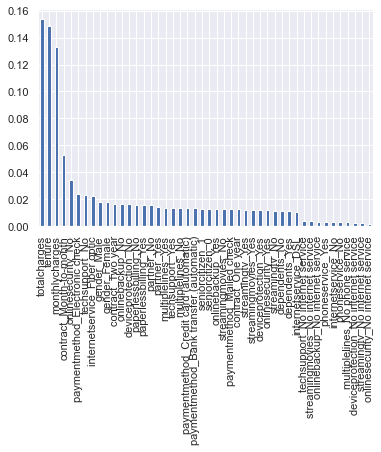

In [21]:
weightsrf = pd.Series(modelforest.feature_importances_,
                 index=X.columns.values)
print (weightsrf.sort_values(ascending = False).plot(kind='bar'))

# Next model we will try is Support Vector Classification (SVC)

In [22]:


from sklearn.model_selection import train_test_split

X_svctrain, X_svctest, y_svctrain, y_svctest = train_test_split(X, y, test_size=0.3)

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
modelSVC = make_pipeline(StandardScaler(), LinearSVC(random_state=1, tol=1e-5,max_iter=10000))
modelSVC.fit(X_svctrain, y_svctrain.values.ravel()) 


#Predict the response for test dataset
y_svctrain_pred = modelSVC.predict(X_svctrain)
y_svctest_pred = modelSVC.predict(X_svctest)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_svctrain, y_svctrain_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", metrics.accuracy_score(y_svctest, y_svctest_pred))
print()




Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8024340770791075

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8163748225272125



Train and Test Data Confusion Matrix:


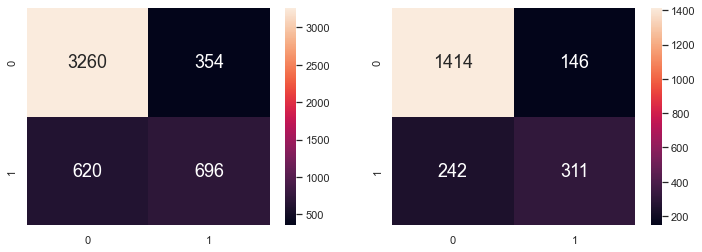

In [23]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix   


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_svctrain, y_svctrain_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_svctest, y_svctest_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Train and Test Data Confusion Matrix:")

In [24]:
print("Print accuracy measures/rates for Test Data: ")
cmTest = confusion_matrix(y_svctest, y_svctest_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))
print()

result4 = pd.Series({'model':"SupportVectorClassifier", 'accuracy':metrics.accuracy_score(y_svctest, y_svctest_pred), 'TPR':(tpTest/(tpTest + fnTest)),
                    'TNR':(tnTest/(tnTest + fpTest)), 'FPR':(fpTest/(fpTest + tnTest)), 'FNR':(fnTest/(fnTest + tpTest))})

Print accuracy measures/rates for Test Data: 
TPR Test :	 0.5623869801084991
TNR Test :	 0.9064102564102564

FPR Test :	 0.09358974358974359
FNR Test :	 0.4376130198915009



# Next I will do a comparison of all the models using the classification accuracy score to determine the best model based on current parameters.

In [25]:
result_final= pd.DataFrame([result1,result2,result3,result4])

result_final

,model,accuracy,TPR,TNR,FPR,FNR
0,DecisionTree,0.803124,0.460573,0.926045,0.073955,0.539427
1,LogisticRegression,0.802177,0.568345,0.885678,0.114322,0.431655
2,RandomForestClassifier,0.798864,0.498141,0.901587,0.098413,0.501859
3,SupportVectorClassifier,0.816375,0.562387,0.906410,0.093590,0.437613


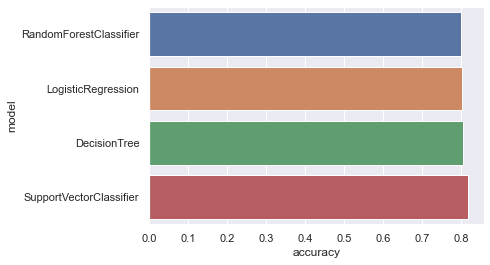

In [26]:
result_final.sort_values(by=['accuracy'], ascending=True,inplace=True)

ax = sb.barplot(x="accuracy", y="model", data=result_final)


### it seems that all the models in general have relatively similar accuracy, different runs of jupyter notebook results in different best models based on accuracy.

Another point of comparison we can look at is to try to pick the best True Positive Rate & True Negative Rate while reducing False Positive and False Negative Rate.


To further tune the models, we can make use of cross-validation and gridsearch for more consistent results and also tuning the parameters of the models to find the best model. Gridsearch allows us to test different hyper-parameters and with cross-validation we can find the best hyper parameter that produce the highest accuracy.

# NOTE: THE CODE BELOW WILL TAKE AWHILE TO RUN DUE TO AS THE MODEL HAS TO TRY DIFFERENT PARAMETERS

In [27]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [28]:
#FIRST I WILL TRAIN random forest with CV and try different parameters

# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,500,50),   # number of trees 
              'max_depth': np.arange(2,7)}             # depth of trees

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(random_state = 1),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.churn.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': array([2, 3, 4, 5, 6]),
                         'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
             scoring='accuracy')

In [29]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=1)
0.8060851926977687


In [30]:

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(2, 10)}           

# Create the Hyper-parameter Grid
dtGrid = GridSearchCV(DecisionTreeClassifier(random_state = 1),  
                      param_grid,
                      cv = 5,                     
                      scoring = 'accuracy')       

# Train the models using Cross-Validation
dtGrid.fit(X_train, y_train.churn.ravel())

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

In [31]:
# Fetch the best Model or the best set of Hyper-parameters
print(dtGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(dtGrid.best_score_))

DecisionTreeClassifier(max_depth=5, random_state=1)
0.797971602434077


In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_iter': [500, 1000, 2000, 3000, 4000, 5000]}          

# Create the Hyper-parameter Grid
lrGrid = GridSearchCV(LogisticRegression(random_state = 1), 
                      param_grid,
                      cv = 5,                     
                      scoring = 'accuracy')       

# Train the models using Cross-Validation
lrGrid.fit(X_train, y_train.churn.ravel())

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1),
             param_grid={'max_iter': [500, 1000, 2000, 3000, 4000, 5000]},
             scoring='accuracy')

In [33]:
# Fetch the best Model or the best set of Hyper-parameters
print(lrGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(lrGrid.best_score_))

LogisticRegression(max_iter=500, random_state=1)
0.8060851926977687


In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {} 
svcPipe = make_pipeline(StandardScaler(), LinearSVC(tol=1e-5,max_iter=10000,random_state = 1))

# FOR SVC, I will just run cross-validation without tuning hyperparameters as there is a max_iter required for this svc model to work.
# Create the Hyper-parameter Grid
svcGrid = GridSearchCV(svcPipe, 
                      param_grid,
                      cv = 5,                     
                      scoring = 'accuracy')       

# Train the models using Cross-Validation
svcGrid.fit(X_train, y_train.churn.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearsvc',
                                        LinearSVC(max_iter=10000,
                                                  random_state=1,
                                                  tol=1e-05))]),
             param_grid={}, scoring='accuracy')

In [35]:
# Fetch the best Model or the best set of Hyper-parameters
print(svcGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(svcGrid.best_score_))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(max_iter=10000, random_state=1, tol=1e-05))])
0.8056795131845842


# After training all the models, we can see what are some of the best hyper parameters for some of these models, for example Decision Tree tend to be most accurate with a depth of 5. Random Forest perform best with max depth of 6 and n-estimators = 200 and etc.

### with these hyper parameters, I will now run a kfold of 10 to compare the distribution of accuracy across multiple runs to find out what is the best model.

LR: 0.802641 (0.008604)
RF: 0.800084 (0.014289)
DT: 0.790287 (0.012582)
SVM: 0.802498 (0.011376)


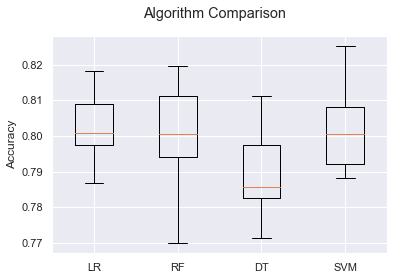

In [37]:
from sklearn import model_selection

models = []
svcPipe = make_pipeline(StandardScaler(), LinearSVC(tol=1e-5,max_iter=10000,random_state = 1))
models.append(('LR', LogisticRegression(max_iter=500,random_state = 1)))
models.append(('RF', RandomForestClassifier(max_depth=6, n_estimators=200,random_state = 1)))
models.append(('DT', DecisionTreeClassifier(max_depth=5,random_state = 1)))
models.append(('SVM', svcPipe))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, y.values.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy')
plt.show()

After running k-fold, we can clearly see what models are the best in terms of accuracy. Logistic Regression and SVM are the best models as compared to Random Forest and Decision Tree for this telco dataset. Both the two models are good for the telco to train their data on as the accuracy scores are generally quite consistent as compared to random forest and decision tree.

With more data from the telco, these models will be even more accurate.

With these model to predict, the telco can then know with good certainty on whether a customer will churn, and thereby make decisions to retain these customers before they churn. For example, they can run marketing campaigns to retain customers who are predicted to churn.